In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
feature_names = ['MedInc', 'AveRooms', 'AveBedrms', 'Population']
X = df[feature_names].values
y = df['MedHouseVal'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = model.predict(X_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("=== Multiple Linear Regression Results ===")
print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

=== Multiple Linear Regression Results ===
R² score: 0.4859
Mean Squared Error (MSE): 0.6737
Root Mean Squared Error (RMSE): 0.8208



In [8]:
print("Feature Coefficients:")
for name, coef in zip(feature_names, model.coef_):
    print(f"  {name:>10}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Feature Coefficients:
      MedInc: 0.5432
    AveRooms: -0.2478
   AveBedrms: 1.1714
  Population: -0.0000
Intercept: 0.0790


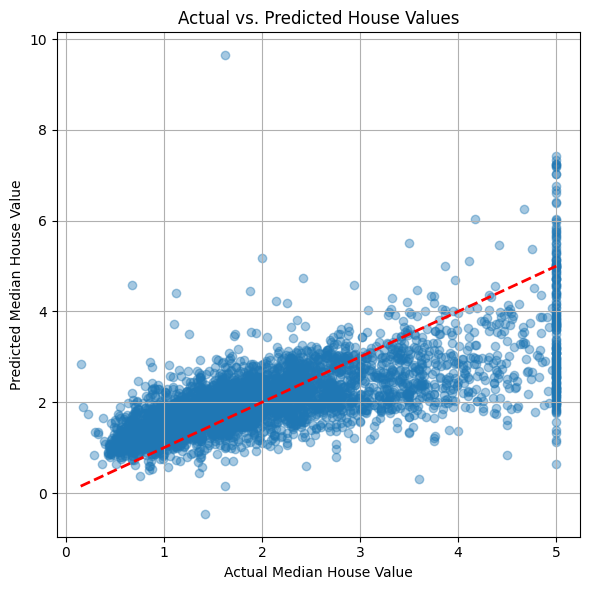

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted House Values")
plt.grid(True)
plt.tight_layout()
plt.show()